In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score, auc, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn import tree

import graphviz 
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


## 1. Exploratory data analysis

Load dataset:


In [2]:
df_train = pd.read_csv("data_train.csv") # Train data
df_test = pd.read_csv("data_test.csv") # Test data

### 1.1. Train Dataset

In [3]:
print(f"SHAPE\n{df_train.shape}\n")
print(df_train.info())

SHAPE
(202944, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth      

In [4]:
print(f"\nTRAIN DATASET DESCRIBE")
df_train.describe()


TRAIN DATASET DESCRIBE


,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


In [5]:
print(f"\nTRAIN DATASET HEAD")
df_train.head()


TRAIN DATASET HEAD


,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [6]:
print(f"\nTRAIN DATASET MIN")
pd.DataFrame.min(df_train)


TRAIN DATASET MIN


Id                        0
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                      12
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   1
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                       1
Education                 1
Income                    1
ExtraMedTest           -199
ExtraAlcoholTest       -199
Status                    0
dtype: int64

In [7]:
print(f"\nTRAIN DATASET MAX")
pd.DataFrame.max(df_train)


TRAIN DATASET MAX


Id                      202943
HighBP                       1
HighChol                     1
CholCheck                    1
BMI                         98
Smoker                       1
Stroke                       1
HeartDiseaseorAttack         1
PhysActivity                 1
Fruits                       1
Veggies                      1
HvyAlcoholConsump            1
AnyHealthcare                1
NoDocbcCost                  1
GenHlth                      5
MentHlth                    30
PhysHlth                    30
DiffWalk                     1
Sex                          1
Age                         13
Education                    6
Income                       8
ExtraMedTest               199
ExtraAlcoholTest           199
Status                       1
dtype: int64

In [8]:
print(f"\nTRAIN DATASET MEDIAN")
pd.DataFrame.median(df_train)


TRAIN DATASET MEDIAN


Id                      101471.5
HighBP                       0.0
HighChol                     0.0
CholCheck                    1.0
BMI                         27.0
Smoker                       0.0
Stroke                       0.0
HeartDiseaseorAttack         0.0
PhysActivity                 1.0
Fruits                       1.0
Veggies                      1.0
HvyAlcoholConsump            0.0
AnyHealthcare                1.0
NoDocbcCost                  0.0
GenHlth                      2.0
MentHlth                     0.0
PhysHlth                     0.0
DiffWalk                     0.0
Sex                          0.0
Age                          8.0
Education                    5.0
Income                       7.0
ExtraMedTest                 0.0
ExtraAlcoholTest             0.0
Status                       0.0
dtype: float64

In [9]:
print(f"\nTRAIN DATASET MEAN")
pd.DataFrame.mean(df_train)


TRAIN DATASET MEAN


Id                      101471.500000
HighBP                       0.428700
HighChol                     0.424344
CholCheck                    0.962655
BMI                         28.379824
Smoker                       0.442634
Stroke                       0.040844
HeartDiseaseorAttack         0.094391
PhysActivity                 0.756302
Fruits                       0.635372
Veggies                      0.811519
HvyAlcoholConsump            0.055912
AnyHealthcare                0.951543
NoDocbcCost                  0.083693
GenHlth                      2.514024
MentHlth                     3.196971
PhysHlth                     4.256455
DiffWalk                     0.168707
Sex                          0.439545
Age                          8.037449
Education                    5.050245
Income                       6.055641
ExtraMedTest                -7.408660
ExtraAlcoholTest            -7.560041
Status                       0.175571
dtype: float64

We will not be using `Id` field, which has no relation to patients’ condition and therefore is not attributes.

In [10]:
df_train = df_train.drop(columns=['Id'])
df_test = df_test.drop(columns=['Id'])

We will check if `Id` columns has dropped yet

In [11]:
print(f"\n{('TRAIN DATASET HEAD')}")
df_train.head()


TRAIN DATASET HEAD


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,...,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,...,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,...,0,0,0,0,9,5,4,-58,0,0


### 1.2 Observation
The target we are trying to predict is the status of `diabetes` (Presence or Absence) development in 
patients

The features we will be using to predict the patients status are:. 

| Features | Data Type | Description | Range | Source |
| :------- | :-------- | :---------- | :-----| :-----:|
| `HighBP` | int | High blood pressure | -Normal: 90/60mmHg and 120/80<br/> -At risk of HighBP: 120/80 and 140/90<br/> -HighBP: 140/90 and 160/100 | [BHF](https://www.bhf.org.uk/informationsupport/risk-factors/high-blood-pressure#whyimportant) |
| `HighChol` | int | High cholesterol | -Normal: Under 200<br/> -At risk of High Choleterol: 200-239<br/> -High Cholesterol: 240 and higher<br/> | [Cleaveland Clinic](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean) |
| `CholCheck` | int | Cholesterol check in 5 years | - | - |
| `BMI` | int | Body Mass Index | -Normal: 18.5-24.9 <br/> -Overweight: 25.0-29.9 <br/> -Obesity: 30 and above | [CDC](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html) |
| `Smoker` | int | Amount of Cigarettes patient had consumed | - | - |
| `Stroke` | int | Have patients ever they had a stroke? | - | - |
| `HeartDiseaseorAttack` | int | Coronary heart disease (CHD) or myocardial infarction (MI) | - | - |
| `PhysActivity` | int | Physical activity in past 30 days - not including jobs | - | - |
| `Fruits` | int | Consume Fruit 1 or more times per day | - | - |
| `Veggies` | int | Consume Vegetables 1 or more times per day | - | - |
| `HvyAlcoholConsump` | int | Heavy drinkers (Adult men more than 14 drinks per week, Adult women more than 7 drinks per week) | - | - |
| `AnyHealthcare` | int | Any kind of health care coverage (health insurance, prepaid plans such as HMO, etc.) | - | - |
| `NoDocbcCost` | int | No Doctor met due to Cost | - | - |
| `GenHlth` | int | Patient's health in general | - | - |
| `MentHlth` | int | Patients' Mental Health in the past 30 days | - | - |
| `PhysHlth` | int | Patients' Physical Health in the past 30 days | - | - |
| `DiffWalk` | int | Difficulty walking or climbing | - | - |
| `Sex` | int | Patient's sex | - | - |
| `Age` | int | Patient's age | - | - |
| `Education` | int | Patient's Education level | - | - |
| `Income` | int | Patient's income level | - | - |
| `ExtraMedTest` | int | The result of extra medical test | - | - |
| `ExtraAlcoholTest` | int | The result of extra alcohol test | - | - |

***
## 2. Visualization

### 2.1 Overview
We will observe the data distribution by creating histograms, boxplots, and correlation matrixs for each column in our datasets. 
- The `histograms` provide a visual representation of the distribution of data in each column of the datasets. 
- The `boxplots` help identify outliers and the spread of data in each column. 
- The `correlation matrix` provides a measure of the linear relationships between pairs of variables.

#### 2.1.1 Histogram Plot

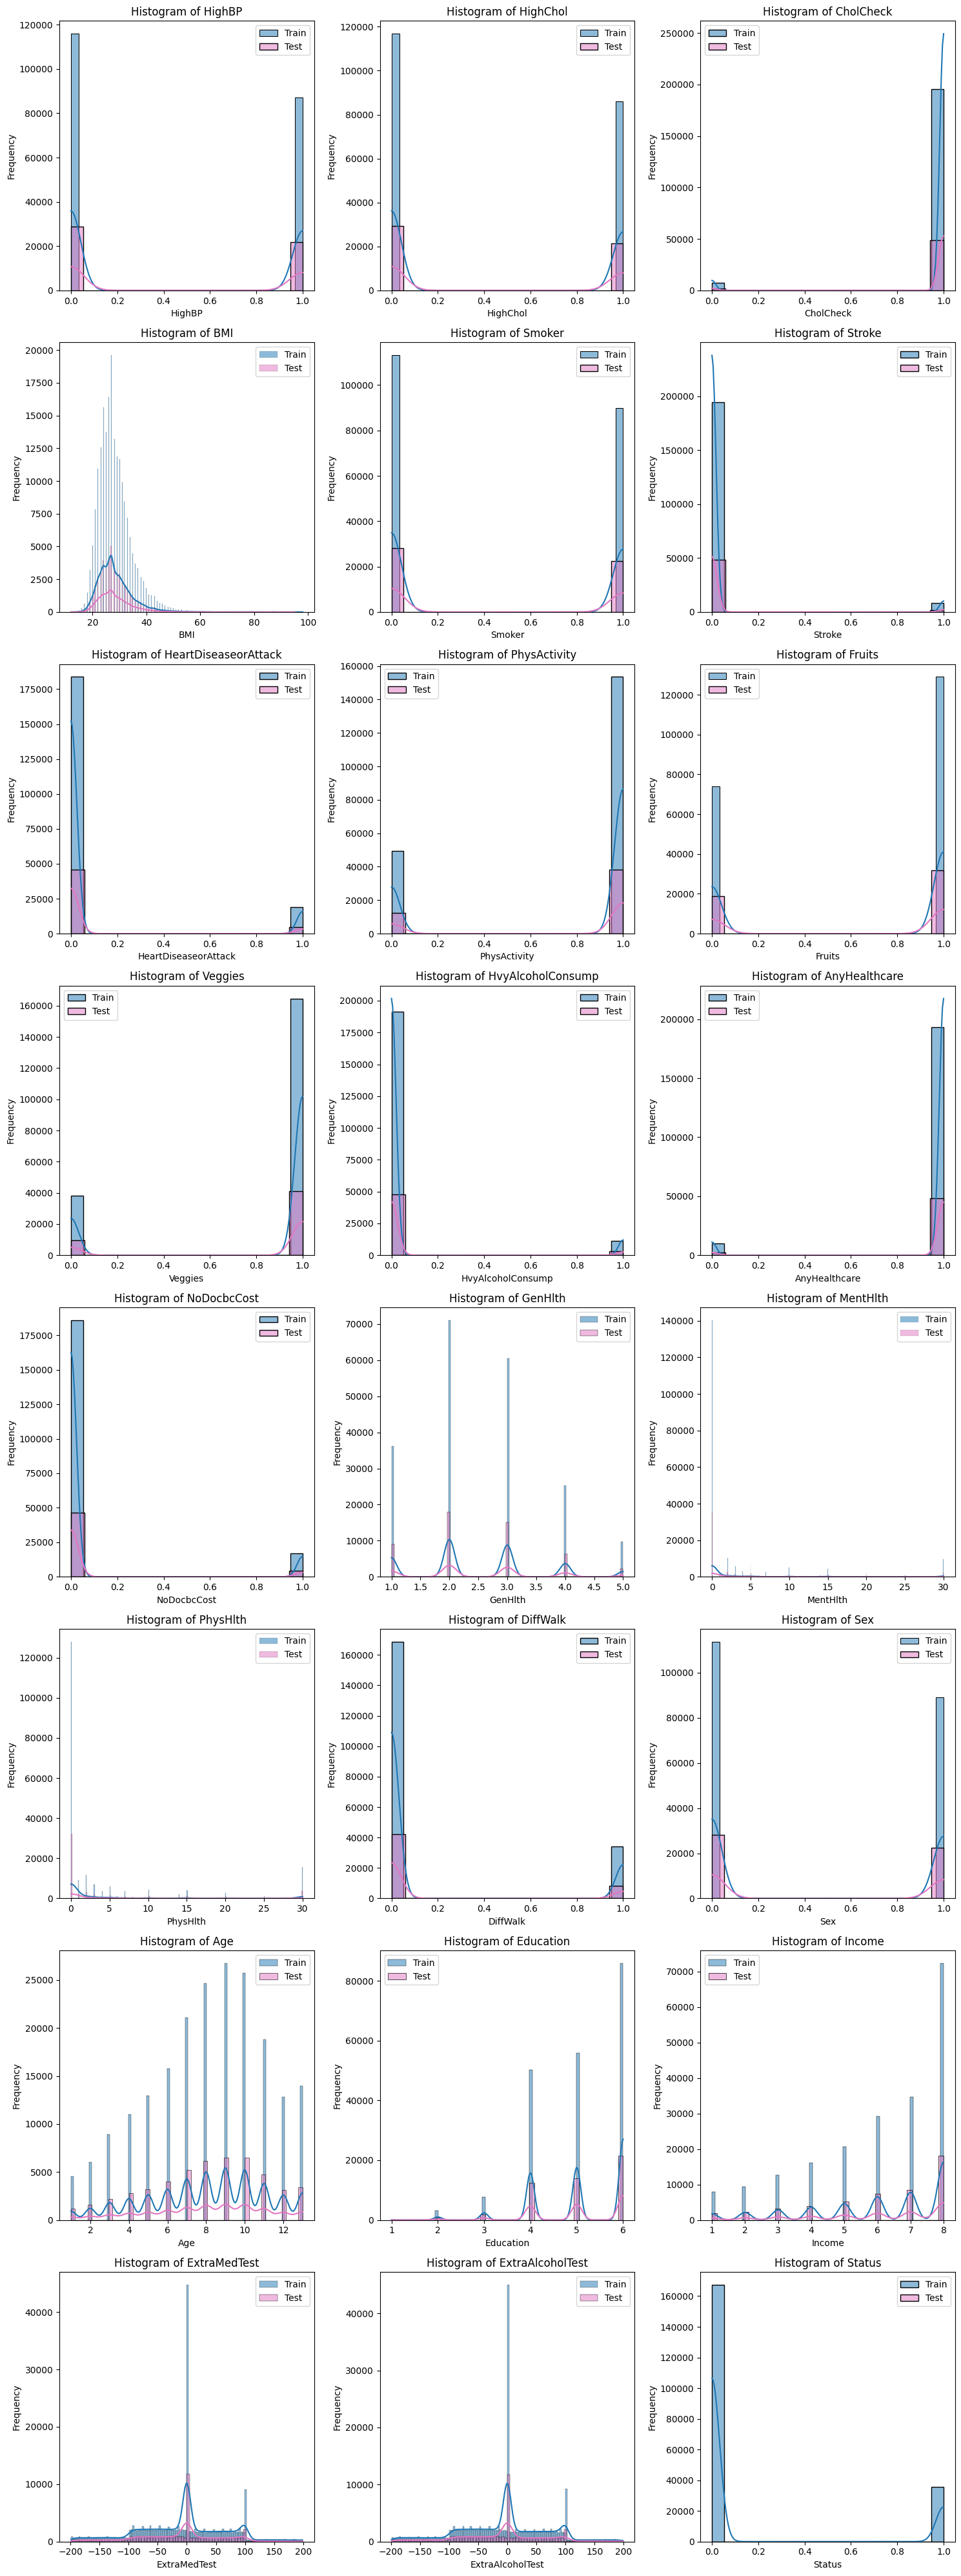

In [12]:
num_features = len(df_train.columns)
num_cols = min(num_features, 3)
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(df_train.columns):
    ax = axes[i]
    sns.histplot(data=df_train, x=column, ax=ax, color='tab:blue', alpha=0.5, label='Train', kde=True)
    sns.histplot(data=df_test, x=column, ax=ax, color='tab:pink', alpha=0.5, label='Test', kde=True)
    ax.set_title(f"Histogram of {column}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(column)
    ax.legend()

for i in range(num_features, len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()


#### 2.1.2 Train Boxplot 

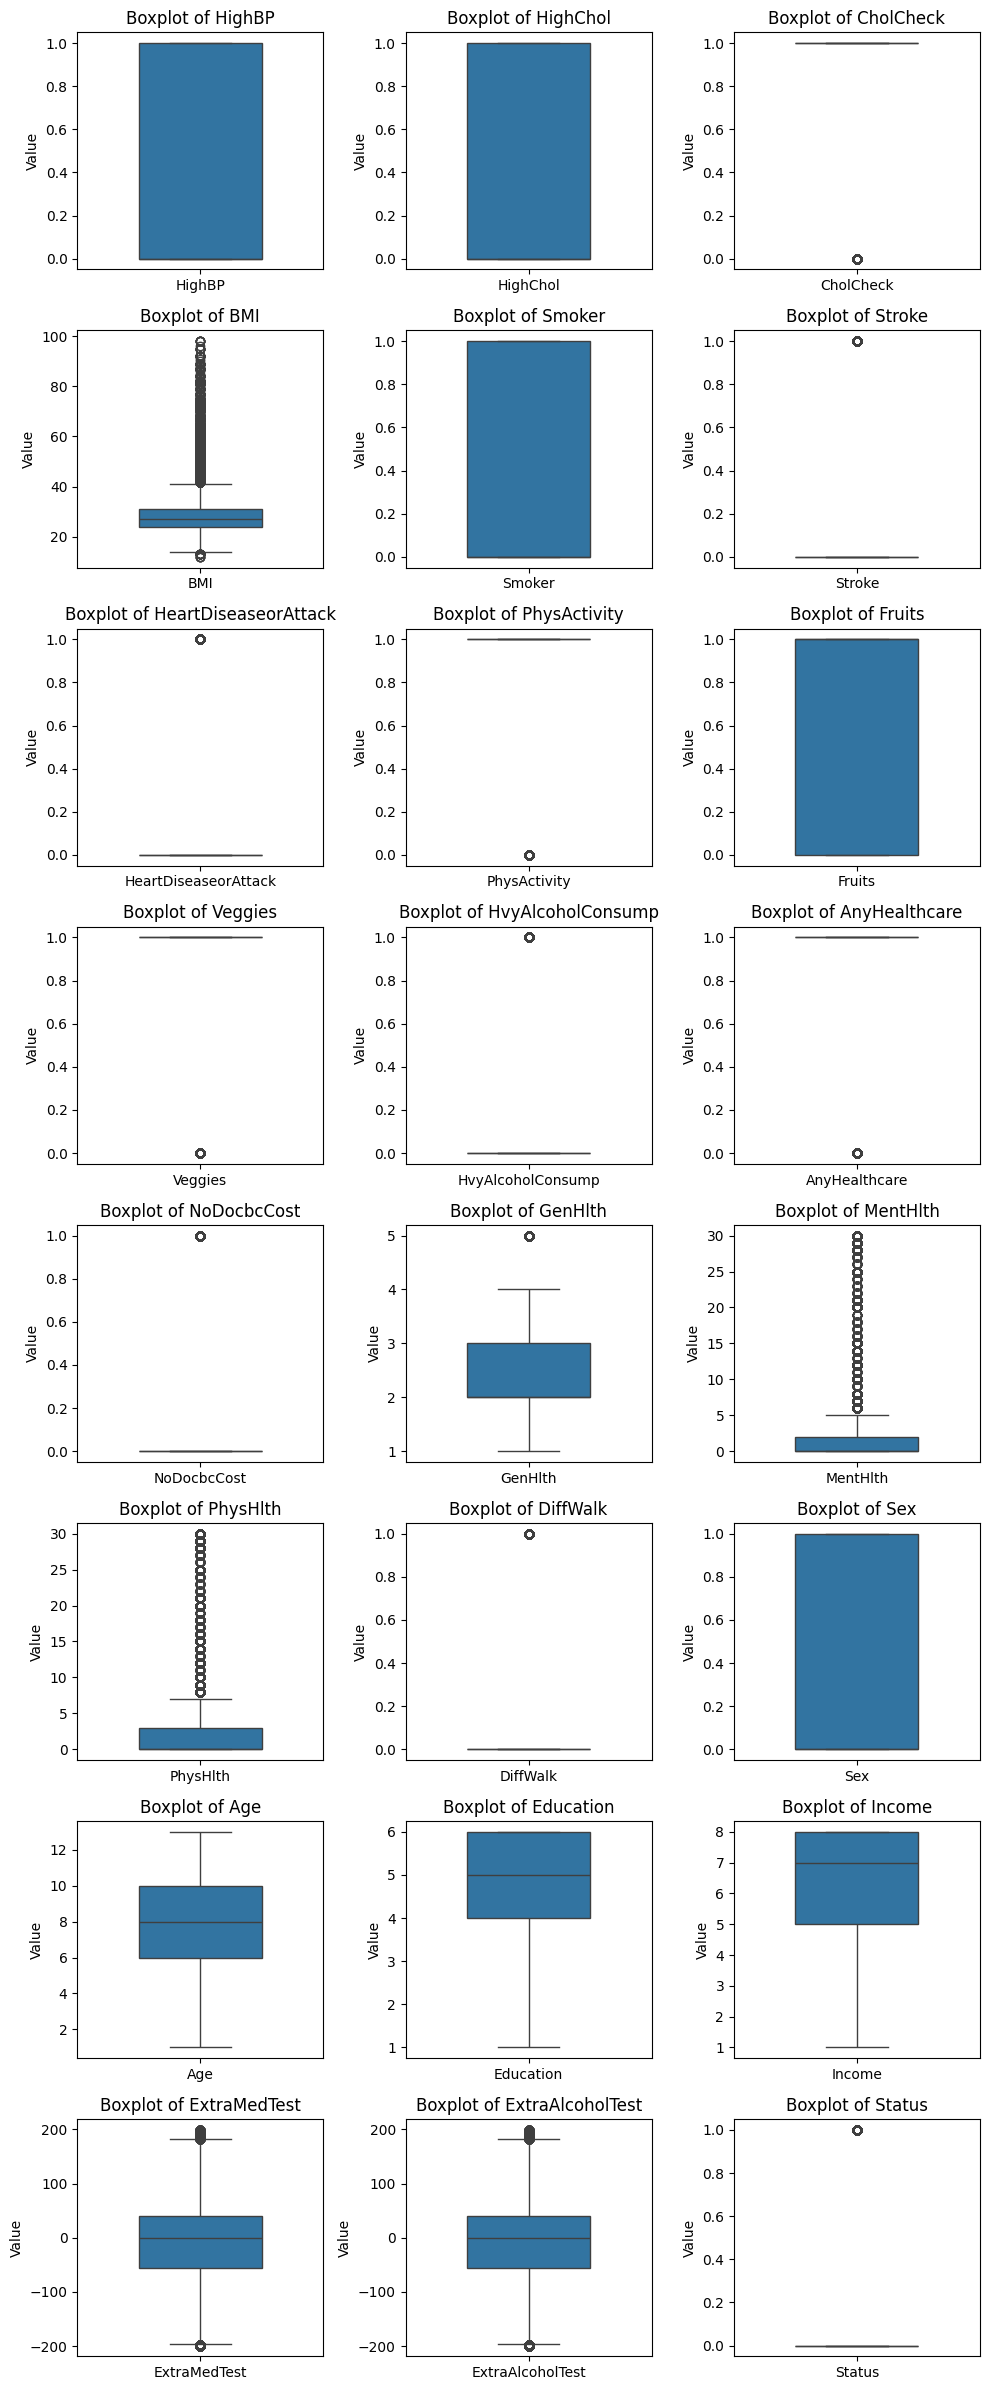

In [13]:
def plot_boxplots(df):
    num_features = len(df.columns)
    num_cols = min(num_features, 3)
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows), constrained_layout=True)
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        ax = axes[i]
        sns.boxplot(data=df[[column]], ax=ax, color='tab:blue', width=0.5)
        ax.set_ylabel("Value")
        ax.set_title(f"Boxplot of {column}")

    for i in range(num_features, len(axes)):
        axes[i].remove()

    plt.tight_layout()
    plt.show()

plot_boxplots(df_train)

### 2.2 Correlation Matrix

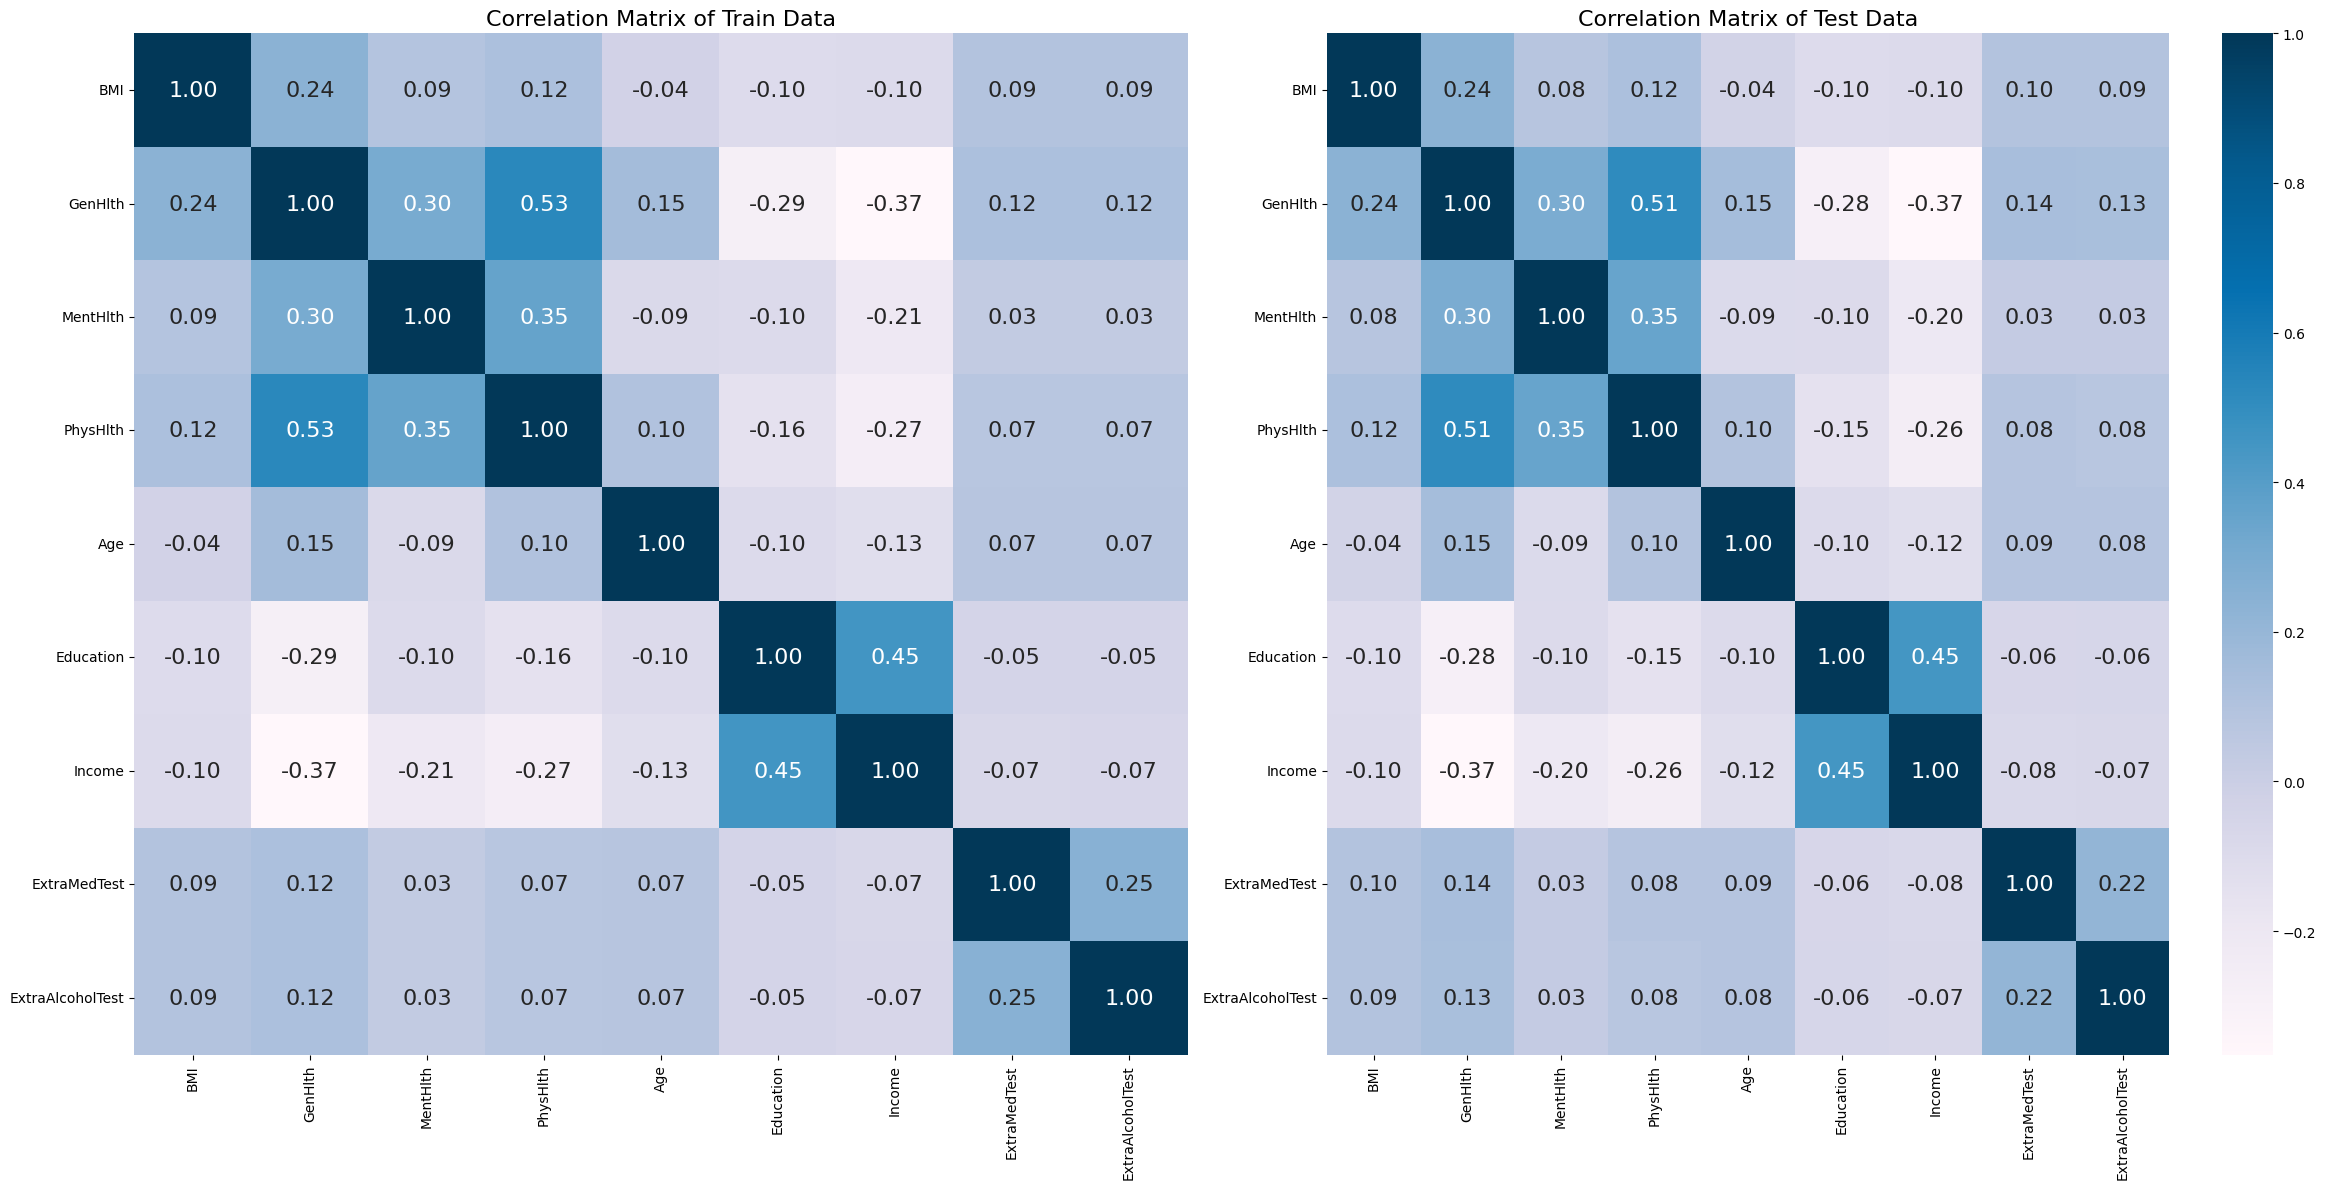

In [14]:
non_binary_cols = [col for col in df_train.columns if df_train[col].nunique() > 2]

train_corr = df_train[non_binary_cols].corr()
test_corr = df_test[non_binary_cols].corr()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 12))

sns.heatmap(train_corr, annot=True, fmt=".2f", cmap='PuBu', ax=ax1, cbar=False, annot_kws={"size": 16})
ax1.set_title("Correlation Matrix of Train Data", fontsize=16)

sns.heatmap(test_corr, annot=True, fmt=".2f", cmap='PuBu', ax=ax2, annot_kws={"size": 16})
ax2.set_title("Correlation Matrix of Test Data", fontsize=16)

plt.tight_layout()
plt.show()

### 2.3 Overview

- The dataset contains both `numerical` and `multi-categorical` variables. Numerical variables will be scaled using the MinMax scaler, which transforms the data to a range between 0 and 1. 

- The distributions of variables in the train and test sets appear to be similar, suggesting that the train set is a good representation of the test set. This similarity increases the likelihood that a model trained on the train set will generalize well to the test set.

- We could observe that there are outliers in our dataset and it can significantly impact the performance of our models. We will need to be addressed during the data preprocessing stage.

We only need to focus on `numerical` columns:

| Column Name | Description | Distribution | Conclusion |
|-------------|-------------|--------------|------------|
| `BMI` | Body Mass Index | Right-skewed, large number of outliers | Need to process outliers |
| `ExtraMedTest` | Extra Medical Test | Right-skewed, large number of outliers | Need to process outliers |
| `ExtraAlcoholTest` | Extra Alcohol Test | Right-skewed, large number of outliers | Need to process outliers |
| `MentHlth` | Mental Health | Right-skewed, large number of outliers | Need to process outliers |
| `PhysHlth` | Physical Health | Right-skewed, large number of outliers | Need to process outliers |

***
## 3. Data Processing



### 3.1 Check missing values
We will check for `NA` values to see if there is any missing values in the dataset 


In [15]:
pd.isna(df_train).sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

It seems like there is no missing values (`NaN`) nor any error values, therefore we now can continue to `Data Processing`

We want to separate the features `X` and target `Y` first.

In [16]:
df_X = df_train.drop(["Status"], axis=1)
df_y = df_train[["Status"]]

Double-check again to see if the `Status` columns has dropped. Because the `Status` columns is our target, therefore we do not need it here.

In [17]:
display(df_X.head())
display(df_y.head())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
0,0,0,1,24,1,0,0,1,0,1,...,2,0,0,0,0,8,4,5,60,0
1,0,0,1,28,0,0,0,1,1,1,...,1,1,0,0,0,2,6,8,0,-64
2,0,0,1,36,1,0,0,1,1,0,...,3,30,30,1,0,3,2,1,-46,0
3,0,1,1,35,0,0,0,1,1,1,...,3,0,0,0,0,8,6,8,-83,-188
4,0,1,1,27,0,0,0,1,0,1,...,3,0,0,0,0,9,5,4,-58,0


,Status
0,0
1,0
2,0
3,0
4,0


### 3.2 Outliers

In [18]:
def print_outliers(df):
 
    numerical_cols = ['BMI', 'ExtraMedTest', 'ExtraAlcoholTest', 'MentHlth', 'PhysHlth']
    df = df[numerical_cols]

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    iqr_outliers = df[((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

    print("IQR Outliers:")
    print(iqr_outliers)

print_outliers(df_train)

IQR Outliers:
        BMI  ExtraMedTest  ExtraAlcoholTest  MentHlth  PhysHlth
2        36           -46                 0        30        30
10       23           -82                 0        30        20
14       26          -161                11         6        24
15       31            30                60        10        20
19       46             0              -151         2         0
...     ...           ...               ...       ...       ...
202924   28             0                 0         0        30
202928   21           -89              -123         0        30
202932   20           -71               -76        20         0
202939   29           -66                 4        10         2
202942   22            59                 0         0        14

[56170 rows x 5 columns]


 Outliers in the numerical columns are handled using the Interquartile Range (IQR) method. These outliers are then "capped" to the lower and upper bounds.

In [19]:
numerical_cols = ['BMI', 'ExtraMedTest', 'ExtraAlcoholTest', 'MentHlth', 'PhysHlth']

imputer = KNNImputer(n_neighbors=100)

df_train[numerical_cols] = imputer.fit_transform(df_train[numerical_cols])

Q1 = df_train[numerical_cols].quantile(0.25)
Q3 = df_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train[numerical_cols] = df_train[numerical_cols].clip(lower_bound, upper_bound, axis=1)

Double-check if we missed any `outliers`

In [20]:
print_outliers(df_train)

IQR Outliers:
Empty DataFrame
Columns: [BMI, ExtraMedTest, ExtraAlcoholTest, MentHlth, PhysHlth]
Index: []


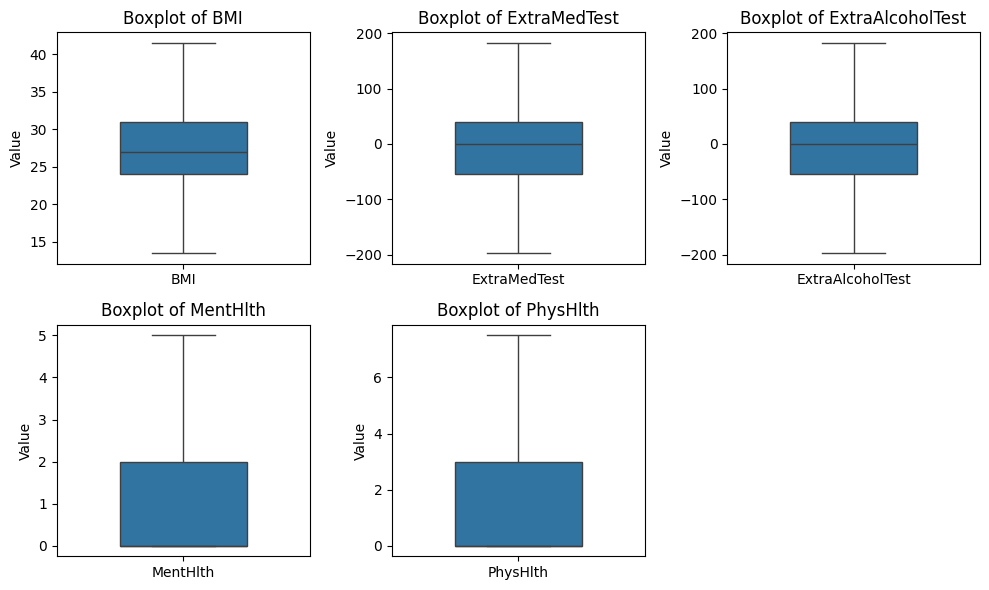

In [21]:
numerical_cols = ['BMI', 'ExtraMedTest', 'ExtraAlcoholTest', 'MentHlth', 'PhysHlth',]
num_cols = min(len(numerical_cols), 3)
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(data=df_train[[column]], ax=ax, color='tab:blue', width=0.5)
    ax.set_ylabel("Value")
    ax.set_title(f"Boxplot of {column}")

for i in range(len(numerical_cols), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()

### 3.3 Data Transformation

We will use log transformation to 'ExtraMedTest' and 'ExtraAlcoholTest' because these two columns are the only columns with a range from -100 to 100, and the rest are binary, non-binary and have a smaller range, therefore we want to apply the log transformation only to these two columns.

In [22]:
scaler = MinMaxScaler()
constant = 0.001

col = ['ExtraMedTest', 'ExtraAlcoholTest']

df_train[col] = np.where(df_train[col] != 0, np.log(df_train[col] + constant), 0)
df_test[col] = np.where(df_test[col] != 0, np.log(df_test[col] + constant), 0)

cols = [col for col in df_train.columns if col != 'Status']

df_train[cols] = scaler.fit_transform(df_train[cols])
df_test[cols] = scaler.transform(df_test[cols])

### 3.4 Splitting 
Split the Train dataset to `Train` and `Test` dataset

In [23]:
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, shuffle=True, random_state=0, test_size=0.2)

train_y = train_y.values
test_y = test_y.values

print(f"train_X shape: {train_X.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"test_X shape: {test_X.shape}")
print(f"test_y shape: {test_y.shape}")

train_X shape: (162355, 23)
train_y shape: (162355, 1)
test_X shape: (40589, 23)
test_y shape: (40589, 1)


Generate `validation` set. Split the data into 60% new training set and 20% validation. 

In [24]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25,shuffle=True )
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)
print(train_y.shape)
print(val_y.shape)
print(test_y .shape)

(121766, 23)
(40589, 23)
(40589, 23)
(121766, 1)
(40589, 1)
(40589, 1)


### 3.5 SMOTE (Synthetic Minority Over-sampling Technique)

We will address the imbalance between negative and positive cases by creating synthetic samples from the minority class in the target column to balance the class disibution.

In [25]:
smote = SMOTE(random_state=42)

train_X, train_y = smote.fit_resample(train_X, train_y)


Let see our baseline model result after preprocessing to see what we have before develop the machine learning models

In [26]:
baseline_clf = LogisticRegression(
    penalty=None, class_weight="balanced", max_iter=1_000, random_state=99)

baseline_clf.fit(train_X, train_y.ravel())
pred_y = baseline_clf.predict(test_X)

In [27]:
baseline_performance_report = classification_report(test_y, pred_y)
print(f"Classification Report:\n{baseline_performance_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     33494
           1       0.62      0.82      0.71      7095

    accuracy                           0.88     40589
   macro avg       0.79      0.86      0.82     40589
weighted avg       0.90      0.88      0.89     40589



## 4. Model Development

### 4.1 Set-ups

Store the developed models and results using `dictionary`.

In [28]:
clfs = dict()

K-Fold Cross Validation

In [29]:
cv = KFold( n_splits=5, shuffle=True, random_state=0)

Model Performance Result Function

In [30]:
def plot_confusion_matrix(true_y: np.ndarray, pred_y: np.ndarray, title: str, ax):
    cm = confusion_matrix(true_y, pred_y)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="g", ax=ax)
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("True Values")
    ax.set_title(title)
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(["Negative", "Positive"])
    ax.set_yticks([0.5, 1.5])
    ax.set_yticklabels(["Negative", "Positive"])

def print_report(classifier, true_train_y: np.ndarray, train_pred_y: np.ndarray,
                      true_val_y: np.ndarray, val_pred_y: np.ndarray,
                      title: str = None) -> None:
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    plt.subplots_adjust(wspace=0.4)

    plot_confusion_matrix(true_train_y, train_pred_y, "Training", axis[0])
    plot_confusion_matrix(true_val_y, val_pred_y, "Validation", axis[1])

    if title is not None:
        fig.suptitle(title, fontsize=16, fontweight="bold", y=1.2)

    plt.show()

    print(f"Classifier: {type(classifier).__name__}")
    print("Training performance:")
    train_report = classification_report(true_train_y, train_pred_y)
    print(train_report)
    print(f"F1 Score: {f1_score(true_train_y, train_pred_y):.2f}")
    print(f"Training score: {accuracy_score(true_train_y, train_pred_y):.2f}")
    print(f"Recall: {recall_score(true_train_y, train_pred_y, average='macro'):.2f}")
    print(f"Precision: {precision_score(true_train_y, train_pred_y, average='macro'):.2f}")

    line_length = max(len(line) for line in train_report.split("\n"))
    print("-" * line_length)

    print("Validation performance:")
    print(classification_report(true_val_y, val_pred_y))
    print(f"F1 Score: {f1_score(true_train_y, train_pred_y):.2f}")
    print(f"Validation score: {accuracy_score(true_val_y, val_pred_y):.2f}")
    print(f"Recall: {recall_score(true_val_y, val_pred_y, average='macro'):.2f}")
    print(f"Precision: {precision_score(true_val_y, val_pred_y, average='macro'):.2f}")

### 4.2 Logistic Regression with Linear Features

#### 4.2.1 Base Model

In [31]:
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.transform(val_X)

clf_linear = LogisticRegression(random_state=0, penalty=None, solver='saga', max_iter=200, class_weight='balanced', n_jobs=-3)

clf_linear.fit(train_X_scaled, train_y.ravel())

train_pred_lin = clf_linear.predict(train_X_scaled)
val_pred_lin = clf_linear.predict(val_X_scaled)
clfs["Linear"] = clf_linear

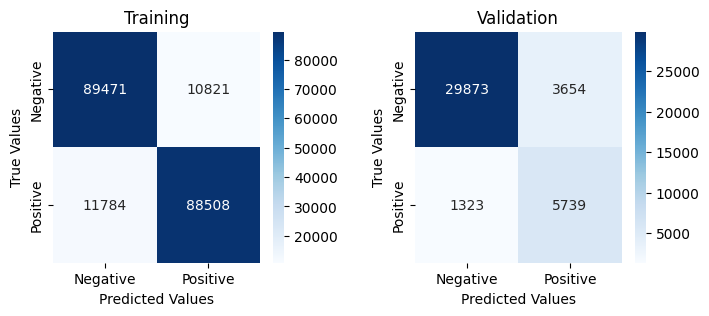

Classifier: LogisticRegression
Training performance:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89    100292
           1       0.89      0.88      0.89    100292

    accuracy                           0.89    200584
   macro avg       0.89      0.89      0.89    200584
weighted avg       0.89      0.89      0.89    200584

F1 Score: 0.89
Training score: 0.89
Recall: 0.89
Precision: 0.89
-----------------------------------------------------
Validation performance:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     33527
           1       0.61      0.81      0.70      7062

    accuracy                           0.88     40589
   macro avg       0.78      0.85      0.81     40589
weighted avg       0.90      0.88      0.88     40589

F1 Score: 0.89
Validation score: 0.88
Recall: 0.85
Precision: 0.78


In [32]:
print_report(clf_linear, train_y, train_pred_lin, val_y, val_pred_lin)

#### 4.2.2 Grid Search Tuning 

In [33]:
params = {"C": 1 / np.logspace(-5, 2, num=10), "penalty": ["l1", "l2"]}

In [34]:
Linear_Grid = GridSearchCV(clf_linear, params, cv=cv, scoring=["f1", "roc_auc"], refit="f1")
Linear_Grid.fit(train_X_scaled, train_y.ravel())

train_pred_lin = Linear_Grid.predict(train_X_scaled)
val_pred_lin = Linear_Grid.predict(val_X_scaled)
clfs["Linear_Grid"] = Linear_Grid

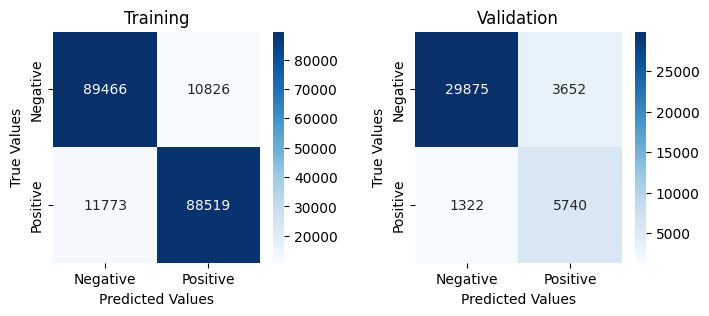

Classifier: GridSearchCV
Training performance:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89    100292
           1       0.89      0.88      0.89    100292

    accuracy                           0.89    200584
   macro avg       0.89      0.89      0.89    200584
weighted avg       0.89      0.89      0.89    200584

F1 Score: 0.89
Training score: 0.89
Recall: 0.89
Precision: 0.89
-----------------------------------------------------
Validation performance:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     33527
           1       0.61      0.81      0.70      7062

    accuracy                           0.88     40589
   macro avg       0.78      0.85      0.81     40589
weighted avg       0.90      0.88      0.88     40589

F1 Score: 0.89
Validation score: 0.88
Recall: 0.85
Precision: 0.78


In [35]:
print_report(Linear_Grid, train_y, train_pred_lin, val_y, val_pred_lin)

### 4.3 Logistic Regression with Polynomial

#### 4.3.1 Base Model

In [36]:
poly = PolynomialFeatures(2)

train_X_log = poly.fit_transform(train_X)
val_X_log = poly.transform(val_X)

scaler.fit(train_X_log)

train_X_log = scaler.transform(train_X_log)
val_X_log = scaler.transform(val_X_log)

In [37]:
clf_logistic = LogisticRegression(random_state=0, penalty=None, solver='saga', max_iter=200, class_weight='balanced', n_jobs=-3)

In [38]:
clf_logistic.fit(train_X_log, train_y.ravel())

train_pred_y = clf_logistic.predict(train_X_log)
val_pred_y = clf_logistic.predict(val_X_log)
clfs["Logistic_Regression"] = clf_logistic

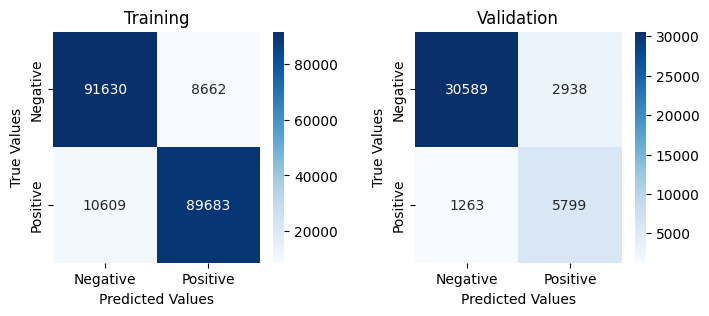

Classifier: LogisticRegression
Training performance:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90    100292
           1       0.91      0.89      0.90    100292

    accuracy                           0.90    200584
   macro avg       0.90      0.90      0.90    200584
weighted avg       0.90      0.90      0.90    200584

F1 Score: 0.90
Training score: 0.90
Recall: 0.90
Precision: 0.90
-----------------------------------------------------
Validation performance:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     33527
           1       0.66      0.82      0.73      7062

    accuracy                           0.90     40589
   macro avg       0.81      0.87      0.83     40589
weighted avg       0.91      0.90      0.90     40589

F1 Score: 0.90
Validation score: 0.90
Recall: 0.87
Precision: 0.81


In [39]:
print_report(clf_logistic, train_y, train_pred_y, val_y, val_pred_y)

#### 4.3.2 Grid Search Tuning

In [40]:
params = {"C": 1 / np.logspace(-5, 2, num=10), "penalty": ["l1", "l2"]}

In [41]:
Logistic_Grid = GridSearchCV(clf_logistic, params, cv=cv, scoring=["f1", "roc_auc"], refit="f1")
Logistic_Grid.fit(train_X_log, train_y.ravel())

train_pred_y = Logistic_Grid.predict(train_X_log)
val_pred_y = Logistic_Grid.predict(val_X_log)
clfs["Logistic_Regression_Grid"] = Logistic_Grid

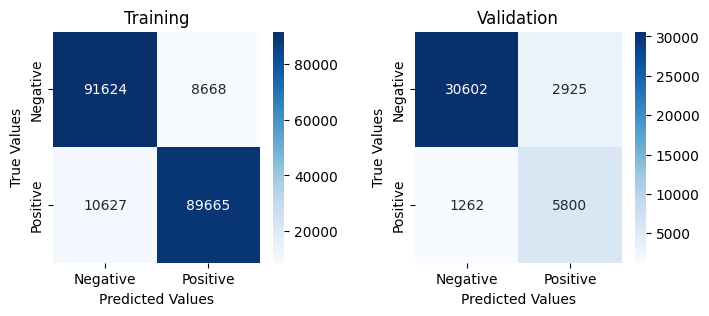

Classifier: GridSearchCV
Training performance:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90    100292
           1       0.91      0.89      0.90    100292

    accuracy                           0.90    200584
   macro avg       0.90      0.90      0.90    200584
weighted avg       0.90      0.90      0.90    200584

F1 Score: 0.90
Training score: 0.90
Recall: 0.90
Precision: 0.90
-----------------------------------------------------
Validation performance:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     33527
           1       0.66      0.82      0.73      7062

    accuracy                           0.90     40589
   macro avg       0.81      0.87      0.84     40589
weighted avg       0.91      0.90      0.90     40589

F1 Score: 0.90
Validation score: 0.90
Recall: 0.87
Precision: 0.81


In [42]:
print_report(Logistic_Grid, train_y, train_pred_y, val_y, val_pred_y)

### 4.4 Decision Tree

#### 4.4.1 Base Model

In [43]:
tree_max_depth = 2 

clf_tree = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=0, max_depth=tree_max_depth)

In [44]:
clf_tree = clf_tree.fit(train_X, train_y.ravel())

train_pred_tree = clf_tree.predict(train_X)
val_pred_tree = clf_tree.predict(val_X)

clfs["Decision_Tree"] = clf_tree

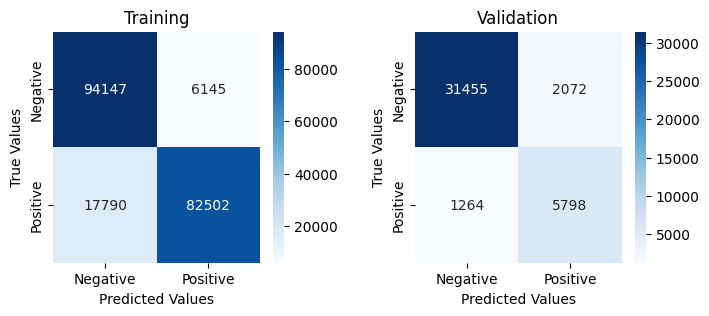

Classifier: DecisionTreeClassifier
Training performance:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89    100292
           1       0.93      0.82      0.87    100292

    accuracy                           0.88    200584
   macro avg       0.89      0.88      0.88    200584
weighted avg       0.89      0.88      0.88    200584

F1 Score: 0.87
Training score: 0.88
Recall: 0.88
Precision: 0.89
-----------------------------------------------------
Validation performance:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     33527
           1       0.74      0.82      0.78      7062

    accuracy                           0.92     40589
   macro avg       0.85      0.88      0.86     40589
weighted avg       0.92      0.92      0.92     40589

F1 Score: 0.87
Validation score: 0.92
Recall: 0.88
Precision: 0.85


In [45]:
print_report(clf_tree, train_y, train_pred_tree, val_y, val_pred_tree)

In [46]:
def get_tree_2_plot(clf_tree):
    class_names = ['0', '1']  # replace with your actual class names
    dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                      feature_names=df_X.columns,  
                      class_names=class_names,
                      filled=True, rounded=True,  
                      special_characters=True)  
    graph = graphviz.Source(dot_data) 
    return graph

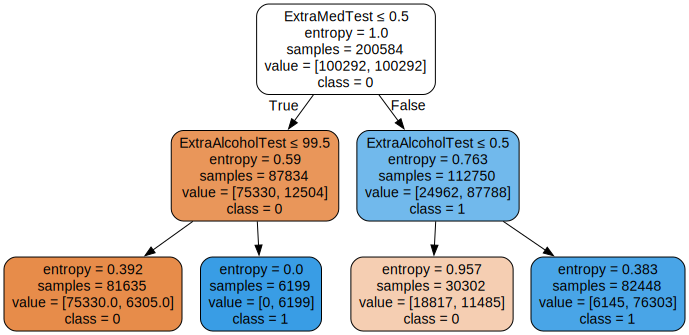

In [47]:
Dtree = get_tree_2_plot(clf_tree)
Dtree

#### 4.4.2 Grid Search Tuning

In [48]:
params = {"max_depth": np.arange(2, 24, 2), "min_samples_split": np.arange(2, 10, 2)}

In [49]:
Tree_Grid = GridSearchCV(clf_tree, params, cv=cv, scoring=["f1", "roc_auc"], refit="f1")
Tree_Grid.fit(train_X, train_y.ravel())

train_pred_tree = Tree_Grid.predict(train_X)
val_pred_tree = Tree_Grid.predict(val_X)
clfs["Decision_Tree_Grid"] = Tree_Grid

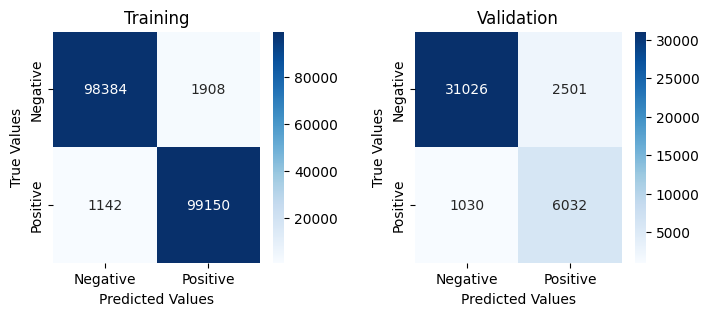

Classifier: GridSearchCV
Training performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    100292
           1       0.98      0.99      0.98    100292

    accuracy                           0.98    200584
   macro avg       0.98      0.98      0.98    200584
weighted avg       0.98      0.98      0.98    200584

F1 Score: 0.98
Training score: 0.98
Recall: 0.98
Precision: 0.98
-----------------------------------------------------
Validation performance:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     33527
           1       0.71      0.85      0.77      7062

    accuracy                           0.91     40589
   macro avg       0.84      0.89      0.86     40589
weighted avg       0.92      0.91      0.92     40589

F1 Score: 0.98
Validation score: 0.91
Recall: 0.89
Precision: 0.84


In [50]:
print_report(Tree_Grid, train_y, train_pred_tree, val_y, val_pred_tree)

### 4.5 Random Forest

#### 4.5.1 Base Model

In [51]:
forest_max_depth = 2
clf_forest = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=0, max_depth=forest_max_depth)

In [52]:
clf_forest.fit(train_X, train_y.ravel())

train_pred_forest = clf_forest.predict(train_X)
val_pred_forest = clf_forest.predict(val_X)

clfs["Random_Forest"] = clf_forest

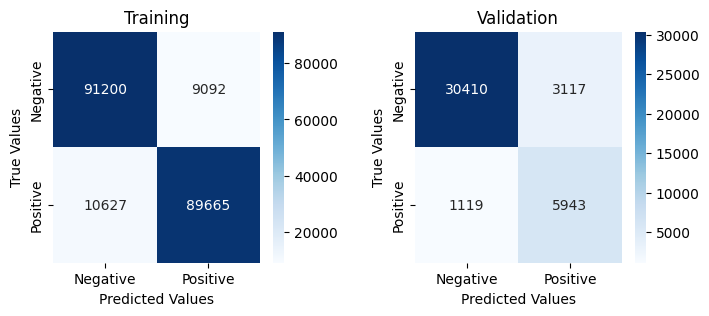

Classifier: RandomForestClassifier
Training performance:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90    100292
           1       0.91      0.89      0.90    100292

    accuracy                           0.90    200584
   macro avg       0.90      0.90      0.90    200584
weighted avg       0.90      0.90      0.90    200584

F1 Score: 0.90
Training score: 0.90
Recall: 0.90
Precision: 0.90
-----------------------------------------------------
Validation performance:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     33527
           1       0.66      0.84      0.74      7062

    accuracy                           0.90     40589
   macro avg       0.81      0.87      0.84     40589
weighted avg       0.91      0.90      0.90     40589

F1 Score: 0.90
Validation score: 0.90
Recall: 0.87
Precision: 0.81


In [53]:
print_report(clf_forest, train_y, train_pred_forest, val_y, val_pred_forest)

#### 4.5.2 Grid Search Tuning

In [54]:
params = {'max_depth':np.arange(2,40, 5), 'min_samples_split':np.arange(2,10,2)}

In [55]:
Forest_Grid = GridSearchCV(clf_forest, params, cv=cv, scoring=["f1", "roc_auc"], refit="f1", return_train_score=True)
Forest_Grid.fit(train_X, train_y.ravel())

train_pred_forest = Forest_Grid.predict(train_X)
val_pred_forest = Forest_Grid.predict(val_X)
clfs["Random_Forest_Grid"] = Forest_Grid

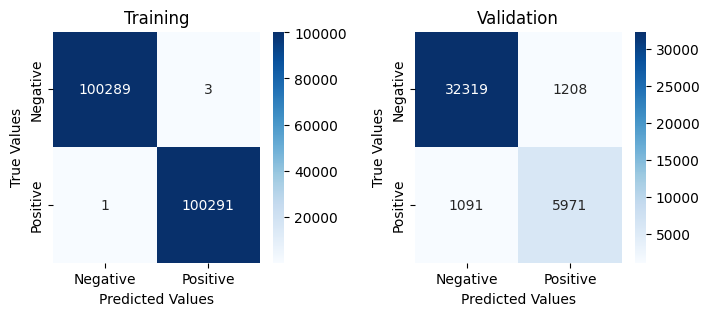

Classifier: GridSearchCV
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100292
           1       1.00      1.00      1.00    100292

    accuracy                           1.00    200584
   macro avg       1.00      1.00      1.00    200584
weighted avg       1.00      1.00      1.00    200584

F1 Score: 1.00
Training score: 1.00
Recall: 1.00
Precision: 1.00
-----------------------------------------------------
Validation performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     33527
           1       0.83      0.85      0.84      7062

    accuracy                           0.94     40589
   macro avg       0.90      0.90      0.90     40589
weighted avg       0.94      0.94      0.94     40589

F1 Score: 1.00
Validation score: 0.94
Recall: 0.90
Precision: 0.90


In [56]:
print_report(Forest_Grid, train_y, train_pred_forest, val_y, val_pred_forest)

## 5. Model Comparision

In [75]:
def plot_roc_curves(clfs, val_X_dict, val_y):
    fig, axis = plt.subplots(figsize=(10, 8))

    max_name_length = max(len(name) for name in clfs.keys())
    print(f"{'Model':<{max_name_length}}{'AUC':>10}")
    print("-" * (max_name_length + 20))
    for name, clf in clfs.items():
        val_X = val_X_dict[name]
        prob_y = clf.predict_proba(val_X)[:, 1]

        fpr, tpr, thresholds = roc_curve(val_y, prob_y)
        roc_auc = auc(fpr, tpr)
        sns.lineplot(x=fpr, y=tpr, label=f"{name} (AUC={roc_auc:.2f})", ax=axis)
        plt.fill_between(fpr, tpr, alpha=0.024)
        print(f"{name:<{max_name_length}}{roc_auc:>10.2f}")

    plt.plot([0, 1], [0, 1], linestyle="--", color="black", alpha=0.1)
    axis.set_xlabel("False Positive Rate")
    axis.set_ylabel("True Positive Rate")
    axis.set_title("ROC Curve - Model Comparison")
    axis.legend()

    plt.show()

Model                          AUC
--------------------------------------------
Linear                        0.93
Linear_Grid                   0.93
Logistic_Regression           0.94
Logistic_Regression_Grid      0.94
Decision_Tree                 0.92
Decision_Tree_Grid            0.90
Random_Forest                 0.94
Random_Forest_Grid            0.97


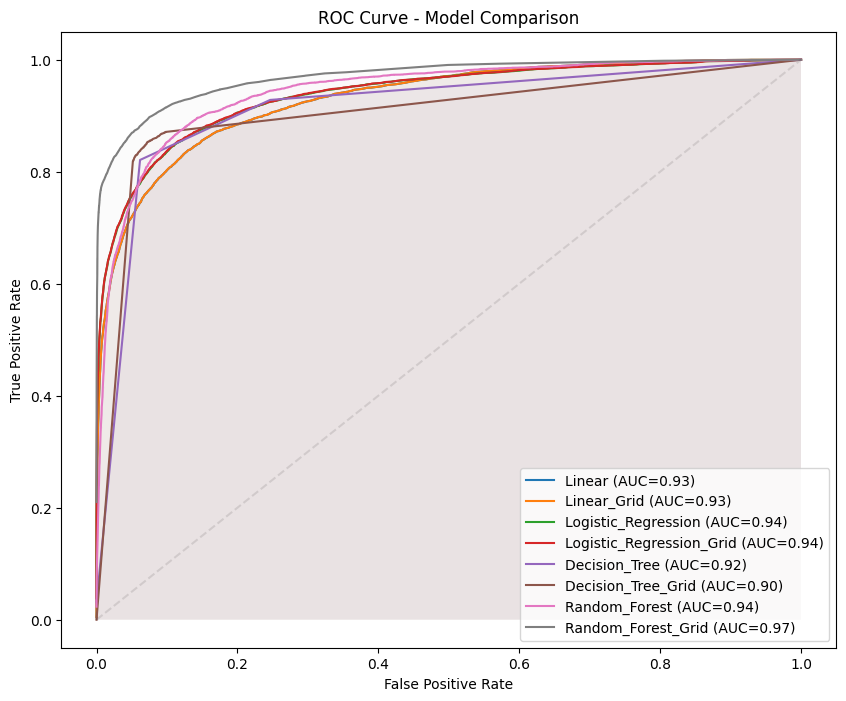

In [76]:
val_X_dict = {
    "Linear": val_X_scaled,
    "Linear_Grid": val_X_scaled,
    "Logistic_Regression": val_X_log,
    "Logistic_Regression_Grid": val_X_log,
    "Decision_Tree": val_X,
    "Decision_Tree_Grid": val_X,
    "Random_Forest": val_X,
    "Random_Forest_Grid": val_X
}

plot_roc_curves(clfs, val_X_dict, val_y)

## Model Selection

Base on the classification report, we could see that all models have a decent F1 score, however the tree based models are slightly overfitted based on its training performance vs. validation performance. Taking overfitted into account, logistic regression based models are slightly better, but when we look at the ROC_AUC curve, the tree based models have higher score. 

I have decided to use `Random Forest Base Model (not tuned)` to be our model to perform predictions:

- It has high F1 score (0.90) and ROC_AUC score (0.94)
- It is good fit with similar scores based on the classification report
- Higher potential to optimize with post-pruning or pre-pruning to increase the overall scores.

In [77]:
data_test = pd.read_csv('data_test.csv')

if 'Id' in data_test.columns:
    test_ids = data_test['Id']
else:
    test_ids = data_test.index

test_X = data_test.drop(columns=['Id', 'Status'], errors='ignore')

test_pred_forest = clf_forest.predict(test_X)

COSC2753_A1_Predictions_S3891483 = pd.DataFrame({
    'Id': test_ids,
    'Status': test_pred_forest
})

COSC2753_A1_Predictions_S3891483['Status'] = np.where(COSC2753_A1_Predictions_S3891483['Status']==1, 'Positive', 'Negative')

COSC2753_A1_Predictions_S3891483.to_csv('COSC2753_A1_Predictions_S3891483.csv', index=False)

In [78]:
COSC2753_A1_Predictions_S3891483.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      50736 non-null  int64 
 1   Status  50736 non-null  object
dtypes: int64(1), object(1)
memory usage: 792.9+ KB


In [79]:
COSC2753_A1_Predictions_S3891483.head()

,Id,Status
0,202944,Negative
1,202945,Negative
2,202946,Negative
3,202947,Negative
4,202948,Negative


In [80]:
COSC2753_A1_Predictions_S3891483 = pd.read_csv('COSC2753_A1_Predictions_S3891483.csv')

status_counts = COSC2753_A1_Predictions_S3891483['Status'].value_counts()

print(status_counts)

Status
Negative    40743
Positive     9993
Name: count, dtype: int64
